In [1]:
import numpy as np

def sigmoid(x):
    """시그모이드 함수"""
    return 1 / (1 + np.exp(-x))


def prediction(X, theta):
    """로지스틱 회귀 가정 함수"""
    return sigmoid(X @ theta)


# 입력 변수
hours_studied = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])  # 공부 시간 (단위: 100시간)
gpa_rank = np.array([0.9, 0.95, 0.8, 0.82, 0.7, 0.6, 0.55, 0.67, 0.4, 0.3, 0.2, 0.2, 0.15, 0.18, 0.15, 0.05]) # 학년 내신 (백분률)
number_of_tries = np.array([1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 2])  # 시험 응시 횟수

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    hours_studied,
    gpa_rank,
    number_of_tries
]).T

# 파라미터 theta 정의
theta = [0.5, 0.3, -2, 0.2]

prediction(X, theta)


array([0.26114999, 0.28699984, 0.37989357, 0.39174097, 0.57199613,
       0.55971365, 0.59868766, 0.54735762, 0.72312181, 0.80218389,
       0.86989153, 0.87653295, 0.85814894, 0.91293423, 0.86989153,
       0.9289057 ])

In [2]:
import numpy as np

def sigmoid(x):
    """시그모이드 함수"""
    return 1 / (1 + np.exp(-x))


def prediction(X, theta):
    """로지스틱 회귀 가정 함수"""
    # 지난 실습의 코드를 여기에 붙여 넣으세요
    return sigmoid(X @ theta)

def gradient_descent(X, theta, y, iterations, alpha):
    """로지스틱 회귀 경사 하강 알고리즘"""
    m = len(X)  # 입력 변수 개수 저장

    for _ in range(iterations):
        # 여기에 코드를 작성하세요
        error = prediction(X, theta) - y
        theta = theta - alpha * (1/m) * (X.T @ error)

    return theta


# 입력 변수
hours_studied = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])  # 공부 시간 (단위: 100시간)
gpa_rank = np.array([0.9, 0.95, 0.8, 0.82, 0.7, 0.6, 0.55, 0.67, 0.4, 0.3, 0.2, 0.2, 0.15, 0.18, 0.15, 0.05]) # 학년 내신 (백분률)
number_of_tries = np.array([1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 2])  # 시험 응시 횟수

# 목표 변수
passed = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])  # 시험 통과 여부 (0: 탈락, 1:통과)

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    hours_studied,
    gpa_rank,
    number_of_tries
]).T

# 목표 변수 y 정의
y = passed

theta = [0, 0, 0, 0]  # 파라미터 초기값 설정
theta = gradient_descent(X, theta, y, 300, 0.1)  # 경사 하강법을 사용해서 최적의 파라미터를 찾는다
theta

array([-1.35280508,  1.61640725, -1.83666046, -0.60286277])

In [20]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [15]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = pd.DataFrame(iris_data.target, columns=["class"])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

In [22]:
model = LogisticRegression(solver='saga', max_iter=2000)

In [23]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='saga')

In [24]:
model.predict(X_test)

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [25]:
model.score(X_test, y_test)

0.9666666666666667

In [26]:
# 필요한 라이브러리 import
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd

wine_data = datasets.load_wine()
""" 데이터 셋을 살펴보는 코드
print(wine_data.DESCR)
"""

# 입력 변수를 사용하기 편하게 pandas dataframe으로 변환
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# 목표 변수를 사용하기 편하게 pandas dataframe으로 변환
y = pd.DataFrame(wine_data.target, columns=['class'])

# 여기에 코드를 작성하세요
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

logistic_model = LogisticRegression(solver='saga', max_iter=7500)  # sci-kit learn에서 로지스틱 모델을 가지고 온다
logistic_model.fit(X_train, y_train)  # 학습 데이터를 이용해서 모델을 학습 시킨다

# 로지스틱 회귀 모델를 이용해서 각 와인 데이터 분류를 예측함
y_test_predict = logistic_model.predict(X_test)

# 로지스틱 회귀 모델의 성능 확인 (정확성 %를 리턴함)
score = logistic_model.score(X_test, y_test)
y_test_predict, score

# 테스트 코드
score = logistic_model.score(X_test, y_test)
y_test_predict, score

(array([0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2]),
 0.75)

# 혼동 행렬(Confusion Matrix)
먼저, 모델의 예측이 어떤 식으로 이루어지는지를 더 자세히 이해하기 위해 혼동 행렬(confusion matrix)을 살펴보겠습니다. 혼동 행렬은 예측 결과와 실제 정답을 조합해 네 가지 경우의 수로 정리한 표로, 다음과 같은 구조를 가집니다

|   |실제 Positive	|실제 Negative|
|---|-----|----|
|예측| Positive	True Positive (TP)	|False Positive (FP)|
|예측| Negative	False Negative (FN)	|True Negative (TN)|


- TP (True Positive): 실제로 Positive인 데이터를 정확히 Positive로 예측한 경우(예: 실제로 불량인 제품을 불량이라고 정확히 예측한 경우)
- FP (False Positive): 실제는 Negative인데, 잘못해서 Positive로 예측한 경우(예: 실제로는 정상인데, 잘못해서 불량이라고 예측한 경우)
- FN (False Negative): 실제는 Positive인데, 잘못해서 Negative로 예측한 경우(예: 실제로는 불량인데, 정상이라고 잘못 예측한 경우)
- TN (True Negative): 실제 Negative 데이터를 정확히 Negative로 예측한 경우입니다(예: 실제로 정상인 제품을 정확히 정상으로 예측한 경우)
혼동 행렬을 통해 모델이 어떤 식으로 예측을 잘하거나 놓치는지 확인할 수 있어요.

### 정확도(Accuracy)
정확도는 예측 결과 중에서 모델이 정답을 맞힌 비율로, 지금까지 사용해 왔던 지표가 바로 정확도입니다. 다시 말해, 모델이 예측한 값 중에서 실제로 맞힌 것(TP와 TN)의 비율을 계산한 지표예요.

$Accuracy =  \frac{TP+TN}{TP+TN+FP+FN}$

정확도는 가장 기본적이고 직관적인 평가 지표이지만, 한 가지 주의할 점이 있습니다. 바로 데이터의 클래스가 불균형한 경우, 이 지표가 실제 성능을 제대로 반영하지 못할 수 있다는 점이에요. 예를 들어, 10,000개 제품 중 10개만 불량이라면, 모든 제품을 정상이라고 예측해도 정확도는 99.9%입니다. 하지만 이 모델이 불량 제품을 전혀 검출하지 못했다면, 사실상 높은 정확도가 무의미하다고 볼 수 있죠. 그래서 분류 문제에서는 정확도 외에도 다른 평가 지표들을 함께 고려해야 합니다.

### 정밀도(Precision)
정밀도는 Positive로 예측한 결과 중 실제로 Positive인 비율을 의미합니다.

$Precision =  \frac{TP}{TP+FP}$

이 지표는 False Positive를 줄이는 데 중점을 둡니다. 예를 들면, 실제 정상인데 모델이 불량이라고 잘못 예측한 경우가 False Positive라고 할 수 있는데요. 이런 오류가 많아지면 정상 제품을 불필요하게 폐기하거나 재검사하게 되어 시간과 자원이 낭비될 수 있겠죠? 이렇게 모델이 불량이라고 예측한 결과들이 실제로도 불량일 가능성이 얼마나 높은지를 확인해야 할 때, 정밀도를 기준으로 삼아 판단합니다.

### 재현율(Recall)
재현율은 실제로 Positive인 데이터 중에서 Positive로 예측된 비율을 의미합니다.

$Recall =  \frac{TP}{TP+FN}$


이 지표는 False Negative를 줄이는 데 중점을 둡니다. 실제로 불량인데 모델이 정상이라고 잘못 예측한 경우가 False Negative에 해당하겠죠? 이런 오류가 많아지면 불량 제품이 검출되지 않은 채 출고되어, 고객 불만, 리콜 등 큰 피해로 이어질 수 있어요. 이상 감지 시스템, 질병 진단 등에서처럼 놓치면 안 되는 항목을 빠짐없이 잡아내는 것이 중요한 상황에서는, 재현율을 기준으로 모델의 성능을 판단합니다.

### 특이도(Specificity)
특이도는 실제 Negative인 데이터 중에서 Negative로 정확히 예측한 비율입니다.

$Specificity =  \frac{TN}{TN+FP}$


특이도는 정밀도와 마찬가지로 False Positive를 줄이는 데 관심을 두지만, 두 지표는 관점이 다릅니다. 정밀도는 모델이 불량이라고 예측한 결과 중 실제로 맞은 비율을 평가하는 반면, 특이도는 실제로 정상인 데이터 중에서 모델이 얼마나 정확하게 정상이라고 판단했는지를 평가합니다.

예를 들어 공항 보안 검색에서 위험 물품이 아닌 일반 짐을 잘못 탐지해 불필요한 재검색을 유발하거나, 금융 사기 탐지 시스템에서 정상 거래를 사기로 잘못 판단해 고객의 계좌를 일시 정지시키는 상황처럼, 실제 Negative인데도 Positive라고 판단하면 비용이 커지는 분야에서 유용하게 사용됩니다.

### F1 점수(F1 Score)
F1 점수는 정밀도와 재현율을 종합적으로 고려하는 지표입니다. 좀 더 자세히 말하자면, 모델이 예측한 Positive가 얼마나 정확한지와, 실제 Positive를 얼마나 잘 놓치지 않았는지를 함께 판단하는데요. F1 점수는 아래 수식과 같이 정밀도와 재현율의 조화 평균으로 나타냅니다.

조화 평균은 두 값이 모두 높을 때에만 평균도 높게 나오며, 둘 중 하나라도 값이 낮으면 전체 점수가 크게 떨어지는 특징이 있어요. 이런 특성 덕분에 정밀도와 재현율 중 하나에만 치우치지 않고 균형 있게 평가할 수 있다는 장점이 있죠.

$F1 = 2· \frac{Precision⋅Recall}{Precision+Recall}$

F1 점수는 주로 데이터의 클래스 불균형이 심하거나, 정밀도와 재현율이 모두 중요한 경우에 사용됩니다. 특히 데이터 클래스 간 불균형이 큰 상황에서 모델의 전반적인 성능을 종합적으로 평가하는 데 적합해요.

### ROC-AUC 점수(ROC-AUC Score)
마지막으로 소개할 평가지표는 ROC-AUC입니다. 이 지표는 분류 모델이 Positive와 Negative를 얼마나 잘 구별하는지를 평가할 때 매우 유용한데요. 특히 이진 분류 문제에서 자주 사용되며, 다양한 임계값을 기준으로 모델의 성능을 종합적으로 살펴볼 수 있다는 장점이 있습니다. ROC-AUC는 크게 두 부분으로 구성됩니다.

### ROC 곡선(ROC Curve)
ROC 곡선은 모델이 예측을 얼마나 잘했는지를 여러 기준으로 확인해볼 수 있는 그래프입니다. 일반적으로 모델은 특정 확률값(예: 0.5)을 기준으로 예측 결과를 Positive 또는 Negative로 분류하는데요. 그런데 이 기준값을 0.1, 0.3, 0.7 등으로 바꾸면 모델의 예측 결과는 당연히 달라지겠죠? 이런 기준값을 임계값(threshold)라고 부르고, 각 임계값에서 계산된 FPR(False Positive Rate)과 TPR(True Positive Rate)이라는 값들의 쌍을 점으로 찍어 연결한 것이 바로 ROC 곡선입니다.

아래 그래프를 보면 가로축은 FPR, 세로축은 TPR 값을 나타내는데요. FPR은 실제로는 Negative인데, 모델이 Positive라고 잘못 판단한 비율을 뜻하고, TPR은 실제로 Positive인 것 중에서, 모델이 Positive라고 정확히 맞힌 비율로, 앞에서 배운 재현율(Recall)과 같습니다. 그리고 각각의 선은 서로 다른 모델을 의미한다고 보시면 되고요. 이때 그래프의 모양은 왼쪽 위로 치우칠수록 좋은 모델이라고 볼 수 있습니다. 그만큼 Positive와 Negative를 명확하게 잘 구분하고 있다는 뜻이니까요.

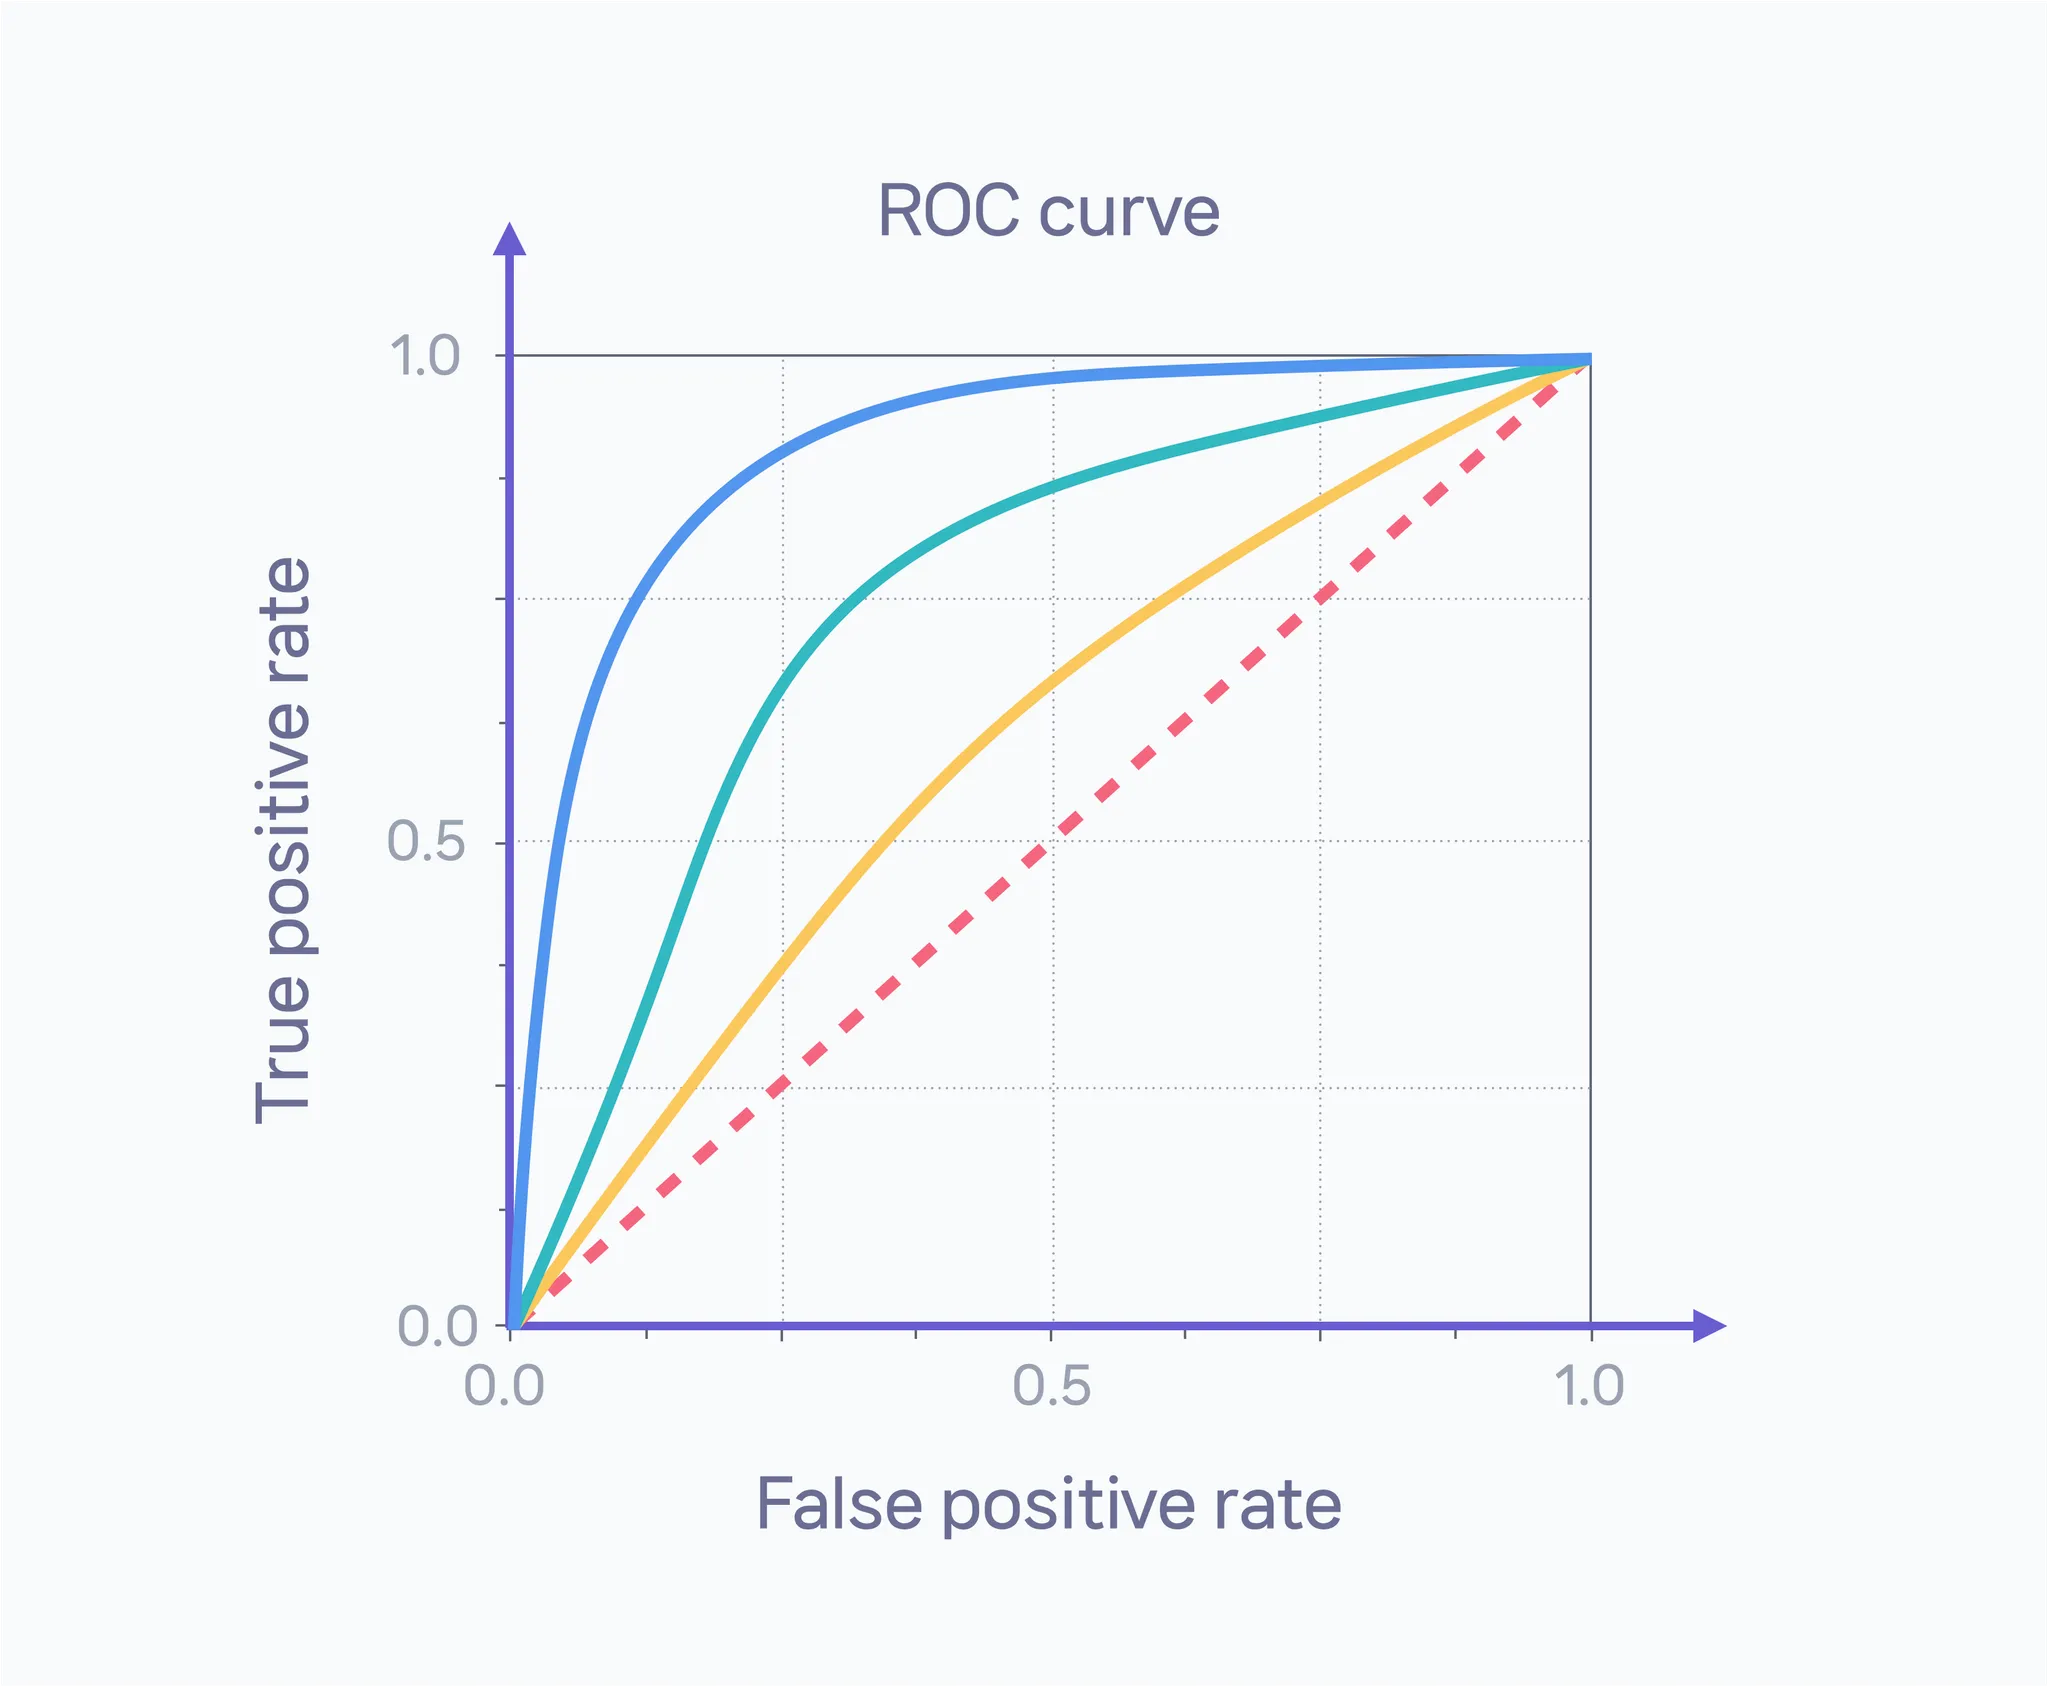




또한 ROC 곡선은 임계값을 조정할 때 발생하는 지표간 trade-off를 잘 보여줍니다. 예를 들어, 임계값을 낮추면 모델은 더 많은 데이터를 Positive로 예측하게 되며, 이로 인해 실제 Positive를 더 잘 찾아내는 경향이 강해져 TPR(재현율)이 높아집니다. 하지만 동시에 실제로는 Negative인 데이터를 Positive로 잘못 분류하는 경우도 많아져 FPR 역시 함께 증가하게 됩니다. 즉, Positive를 더 많이 잡아내려 할수록 잘못된 Positive도 늘어나는 위험이 뒤따르게 되는 것이죠. 이처럼 한 성능 지표를 높이면 다른 지표가 희생될 수 있는 관계를 trade-off라고 하며, ROC 곡선은 임계값을 어떻게 설정하느냐에 따라 TPR과 FPR이 어떻게 달라지는지를 한눈에 파악할 수 있도록 도와줍니다.

### AUC(Area Under Curve)
AUC는 말 그대로 ROC 곡선 아래의 면적을 뜻합니다. 이 면적의 크기를 통해 모델의 전체적인 성능을 하나의 숫자로 요약할 수 있어요. ROC-AUC score는 바로 이 AUC 값을 의미하며, 곡선 아래의 면적이 클수록 성능이 우수한 모델이에요. AUC 값이 1에 가까울수록 모델이 Positive와 Negative를 정확히 구분하고 있다는 의미이고, AUC 값이 0.5에 가까우면 무작위로 분류하는 것과 같다고 볼 수 있습니다. AUC가 높을수록 전반적인 분류 성능이 우수한 모델이라고 볼 수 있어요.

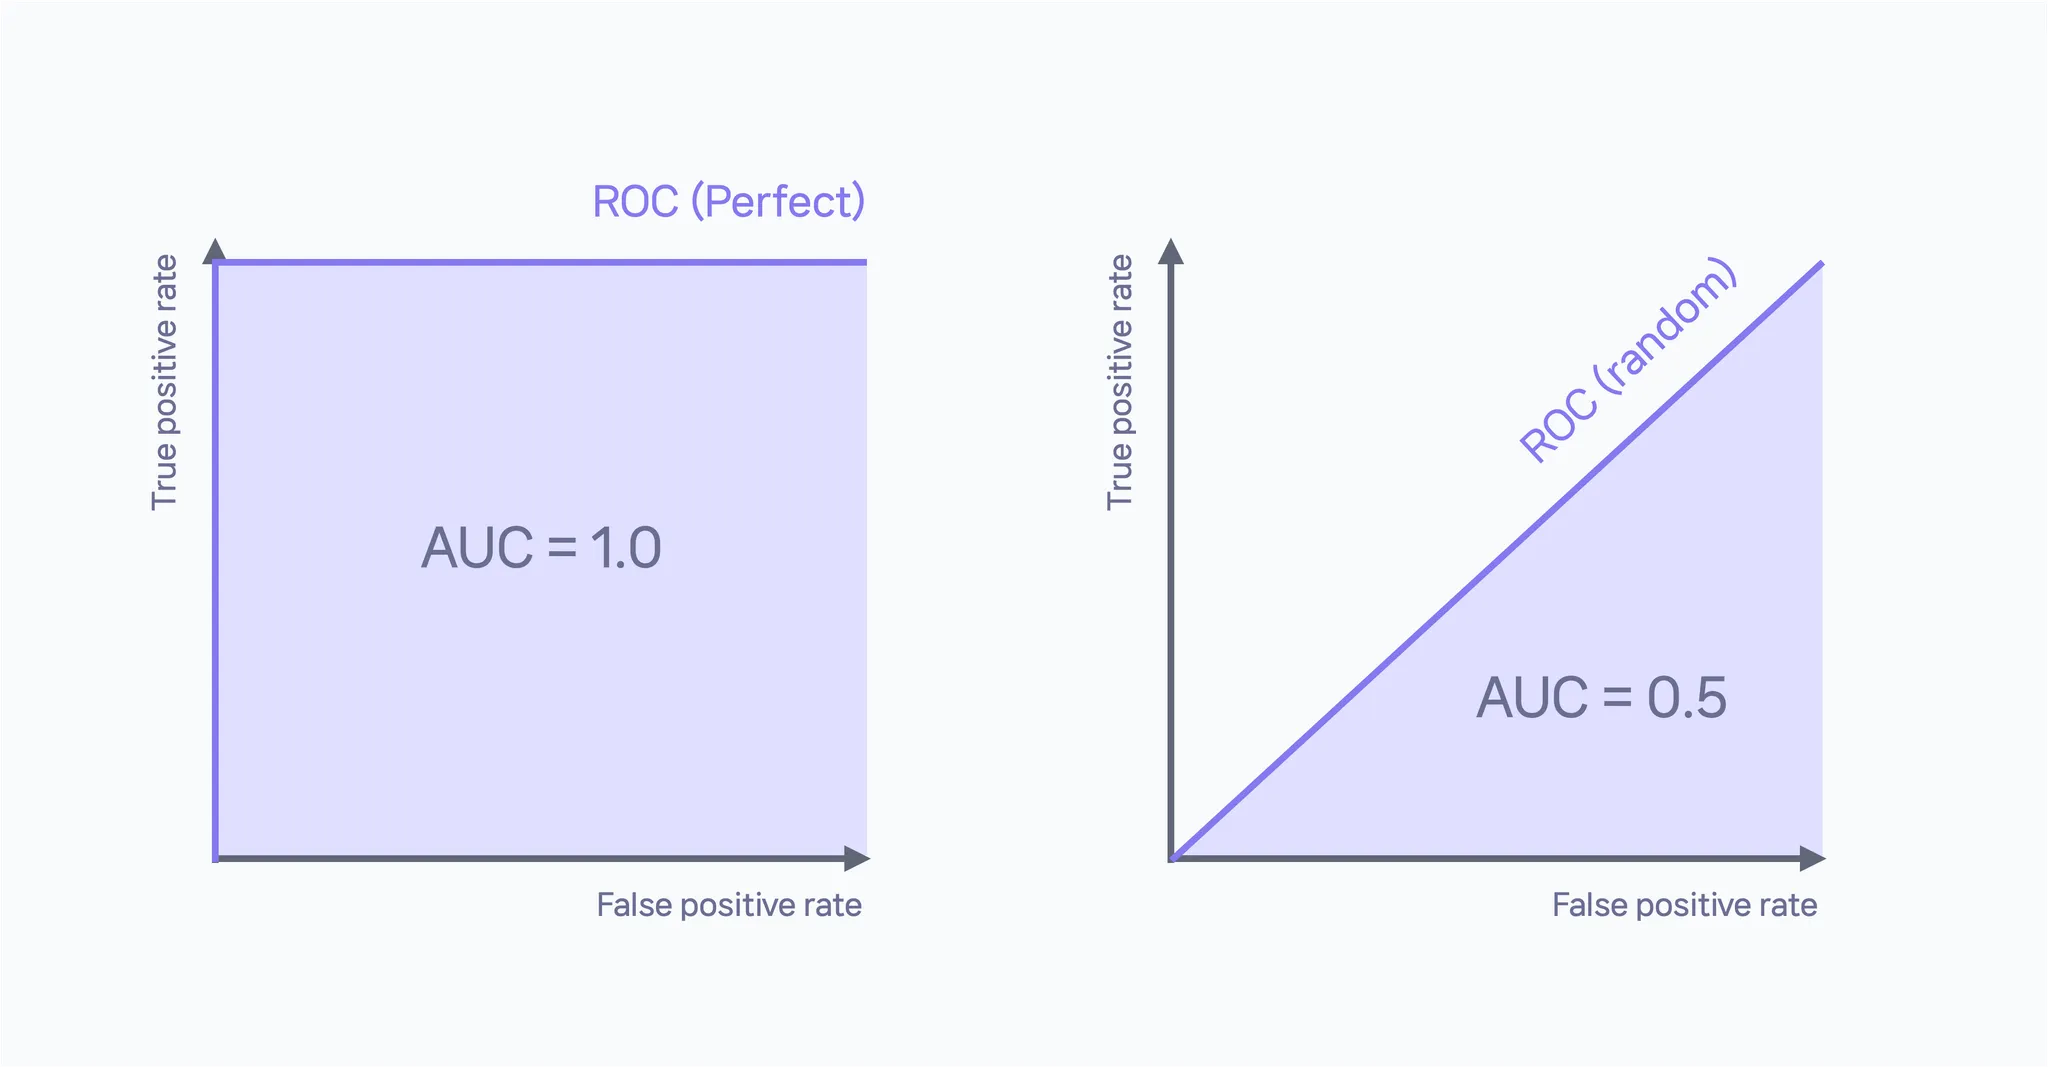

## |scikit-learn으로 평가 지표 계산하기
이제부터는 scikit-learn을 사용해서 분류 모델의 성능을 평가하기 위한 지표를 계산해 보겠습니다. 이번에는 환자들의 유방암 여부가 기록된 데이터를 사용하겠습니다.

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.DataFrame(cancer_data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

model = LogisticRegression(solver='saga', max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000, solver='saga')

정확도는 이전 영상처럼 `score()` 함수를 통해 구할 수도 있지만, `sklearn.metrics`의 `accuracy_score()` 함수를 사용해서 구할 수도 있어요. 마찬가지로, 나머지 지표들과 혼동 행렬도 아래와 같이 손쉽게 구할 수 있습니다.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 예측 결과
y_pred = model.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)

# 정밀도 (다중 클래스의 경우 average 옵션 필요)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro': 클래스별 정밀도의 단순 평균, 'average': 각 클래스의 샘플 수를 가중치로 고려
print("precision: ", precision)

# 재현율
recall = recall_score(y_test, y_pred, average='macro')
print("recall: ", recall)

# F1 점수
f1 = f1_score(y_test, y_pred, average='macro')
print("f1 score: ", f1)

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print("\ncontusion matrix:\n", conf_matrix)


accuracy:  0.9210526315789473
precision:  0.9330103575008353
recall:  0.9090909090909092
f1 score:  0.9170641015277665

contusion matrix:
 [[40  8]
 [ 1 65]]


특이도는 바로 계산할 수 있는 함수가 없기 때문에, 아래와 같이 혼동 행렬을 가지고 값을 직접 계산해야 합니다.

In [29]:
tn, fp, fn, tp = conf_matrix.ravel()

# 특이도
specificity = tn / (tn + fp)
print("Specificity:", specificity)


Specificity: 0.8333333333333334


마지막으로는 ROC-AUC 점수를 계산해 보겠습니다.

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# 예측 확률과 ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)
print("roc-auc score: ", auc)

roc-auc score:  0.9788510101010102


또한, ROC 곡선을 시각화해 보면 모델의 전체적인 분류 성능을 직관적으로 이해하는 데 도움이 됩니다.

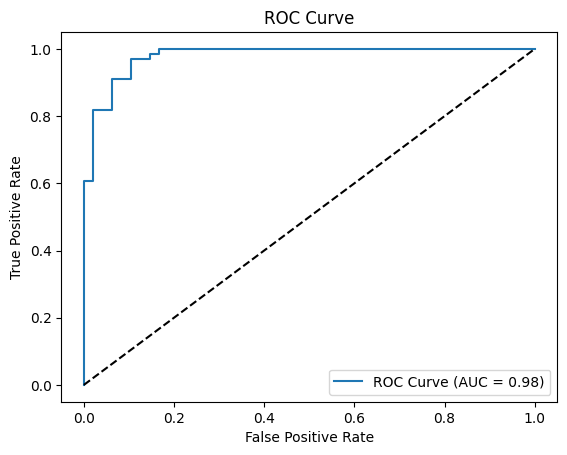

In [34]:
import matplotlib.pyplot as plt
# 시각화
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()